# Ich hab mir hier richtig Mühe gegeben :D


[Zum Google-Drive, wo ihr eure Bilder hochladen könnt](https://drive.google.com/drive/folders/1_ZBb3fcsFzG69OGAO-sH6MpMNz8M2pOn?usp=sharing)

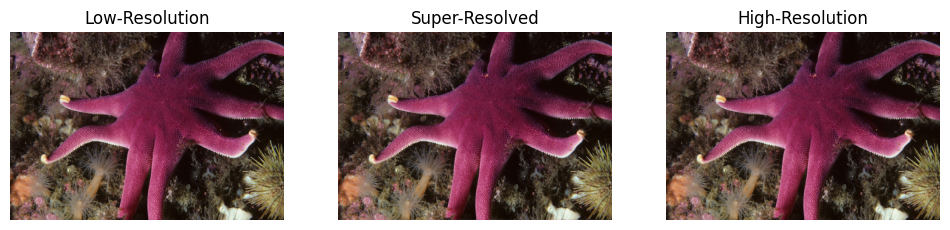

In [4]:
from torchsr.datasets import Div2K
from torchsr.models import ninasr_b0
from torchvision.transforms.functional import to_pil_image, to_tensor
import matplotlib.pyplot as plt
import torch

# Dataset laden
dataset = Div2K(root="./scripts/data", scale=2, download=False)
hr, lr = dataset[0]

# Modell laden
model = ninasr_b0(scale=2, pretrained=True)
model.eval()

# Super-Resolution ausführen
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
lr_t = to_tensor(lr).unsqueeze(0).to(device)
with torch.no_grad():
    sr_t = model(lr_t)
sr = to_pil_image(sr_t.squeeze(0).cpu().clamp(0, 1))

# Bilder anzeigen
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(lr)
axs[0].set_title("Low-Resolution")
axs[1].imshow(sr)
axs[1].set_title("Super-Resolved")
axs[2].imshow(hr)
axs[2].set_title("High-Resolution")
for ax in axs: ax.axis("off")
plt.show()


Jetzt probieren wir mal unsere eigenen Datein aus!

In [ ]:
import os
import gdown

folder_id = "1_ZBb3fcsFzG69OGAO-sH6MpMNz8M2pOn"
target_dir = "./scripts/google_drive_pictures"
os.makedirs(target_dir, exist_ok=True)

folder_url = f"https://drive.google.com/drive/folders/{folder_id}"

gdown.download_folder(url=folder_url, output=target_dir, quiet=False, use_cookies=False)

print(f"Alle Bilder wurden in '{target_dir}' heruntergeladen!")


# Und unser tolles Skript :D


In [ ]:
from pathlib import Path
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch
from torchsr.models import ninasr_b0
import matplotlib.pyplot as plt

# 1️⃣ Pfad zu deinem Google Drive Ordner (lokal heruntergeladen)
image_dir = Path("./scripts/google_drive_pictures/yannik")
image_paths = list(image_dir.rglob("*.png")) + list(image_dir.rglob("*.jpg"))

print(f"Gefundene Bilder: {len(image_paths)}")

# 2️⃣ Modell laden
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ninasr_b0(scale=2, pretrained=True).to(device)
model.eval()

# 3️⃣ Schleife über Bilder
for img_path in image_paths:
    lr = Image.open(img_path).convert("RGB")
    
    # SR ausführen
    lr_t = to_tensor(lr).unsqueeze(0).to(device)
    with torch.no_grad():
        sr_t = model(lr_t)
    sr = to_pil_image(sr_t.squeeze(0).cpu().clamp(0, 1))
    
    # Ergebnis anzeigen
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(lr)
    axs[0].set_title("Original / LR")
    axs[0].axis("off")
    
    axs[1].imshow(sr)
    axs[1].set_title("Super-Resolved")
    axs[1].axis("off")
    
    plt.suptitle(img_path.name)
    plt.show()
